<a href="https://colab.research.google.com/github/antipovaya/probability-theory-and-mathematical-statistics/blob/main/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Корреляция** – это математический показатель, по которому можно судить о наличии статистической взаимосвязи между двумя и более случайными величинами.

**Теория корреляции**

Основные коэффициенты корреляции:

**Коэффициент Пирсона (r)**


* Для линейных отношений

* Интервальные данные

* Нормальное распределение

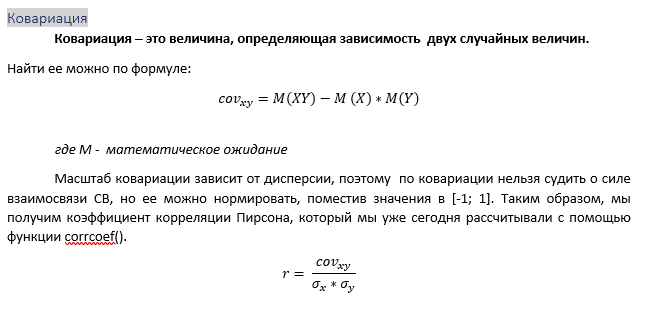

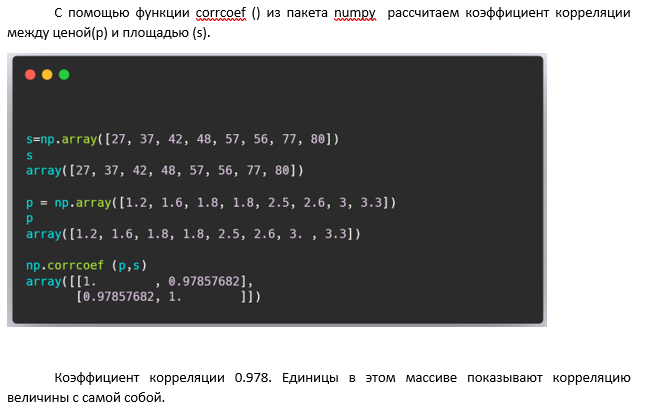

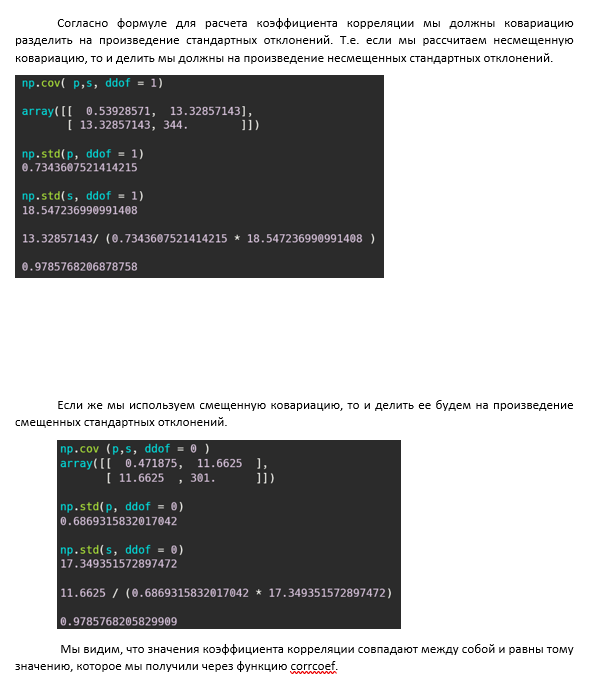




**Коэффициент Спирмена (ρ)**

Коэффициент корреляции Спирмена называют ранговым коэффициентом корреляции. Он также показывает тесноту линейной связи, но в отличии от коэффициента корреляции Пирсона не требует нормальности распределений случайных величин и применяется для количественных и  порядковых данных.
Рассчитаем коэффициент корреляции Спирмена в Python помощью функции spearmanr().

* Для монотонных отношений

* Порядковые данные

* Не требует нормальности


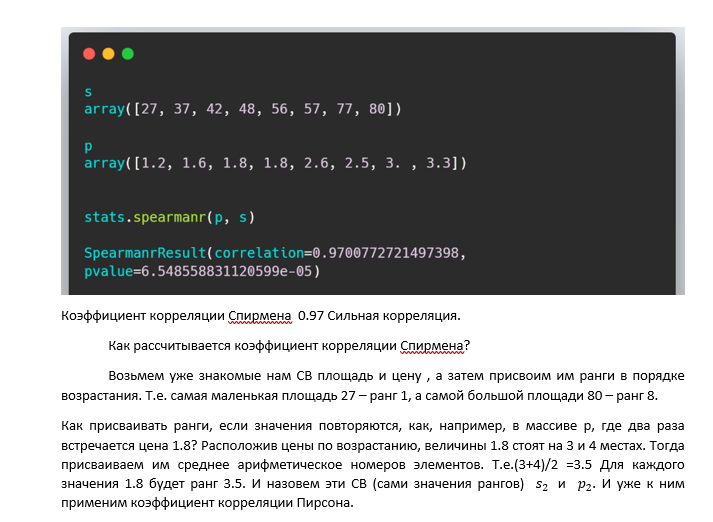

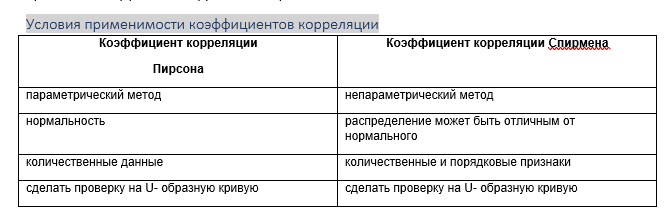



**Коэффициент Кендалла (τ)**

* Аналогичен Спирмену

* Более робастный к выбросам

* Лучше для маленьких выборок

**Интерпретация коэффициентов:**

±0.9 - ±1.0: очень сильная корреляция

±0.7 - ±0.9: сильная корреляция

±0.5 - ±0.7: умеренная корреляция

±0.3 - ±0.5: слабая корреляция

±0.0 - ±0.3: очень слабая или отсутствует


**Практические задачи на Python**

**Задача 1: Корреляция Пирсона**

ЗАДАЧА 1: Корреляция Пирсона
Коэффициент корреляции Пирсона: r = 0.9396
P-value: 0.0000
R²: 0.8829
✅ Корреляция статистически значима


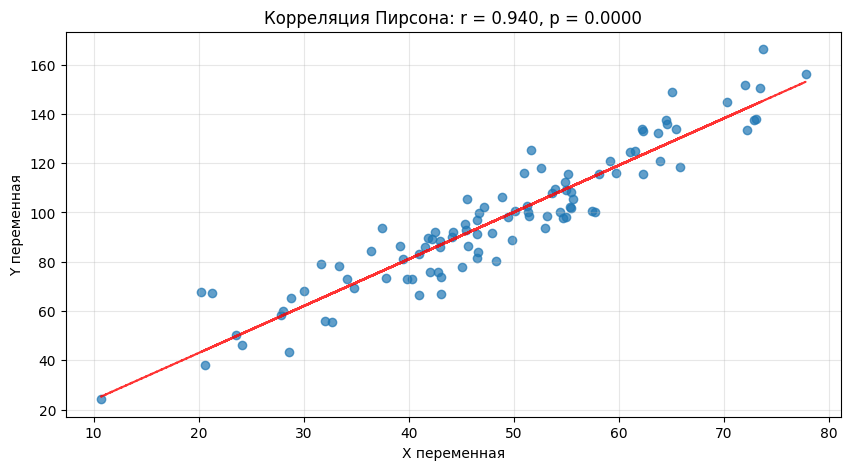

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Генерация данных с линейной зависимостью
np.random.seed(42)
n = 100
x = np.random.normal(50, 15, n)
y = 2 * x + np.random.normal(0, 10, n)  # Линейная зависимость с шумом

# Расчет корреляции Пирсона
pearson_corr, pearson_p = stats.pearsonr(x, y)

print("ЗАДАЧА 1: Корреляция Пирсона")
print("=" * 50)
print(f"Коэффициент корреляции Пирсона: r = {pearson_corr:.4f}")
print(f"P-value: {pearson_p:.4f}")
print(f"R²: {pearson_corr**2:.4f}")

# Интерпретация
alpha = 0.05
if pearson_p < alpha:
    print("✅ Корреляция статистически значима")
else:
    print("❌ Корреляция не значима")

# Визуализация
plt.figure(figsize=(10, 5))
plt.scatter(x, y, alpha=0.7)
plt.title(f'Корреляция Пирсона: r = {pearson_corr:.3f}, p = {pearson_p:.4f}')
plt.xlabel('X переменная')
plt.ylabel('Y переменная')

# Линия тренда
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", alpha=0.8)

plt.grid(True, alpha=0.3)
plt.show()

In [4]:
np.corrcoef(y, x)


array([[1.        , 0.93963823],
       [0.93963823, 1.        ]])

**Задача 2: Корреляция Спирмена**


ЗАДАЧА 2: Корреляция Спирмена
Коэффициент корреляции Спирмена: ρ = 0.7691
P-value: 0.0000
Коэффициент Пирсона для сравнения: r = 0.7931


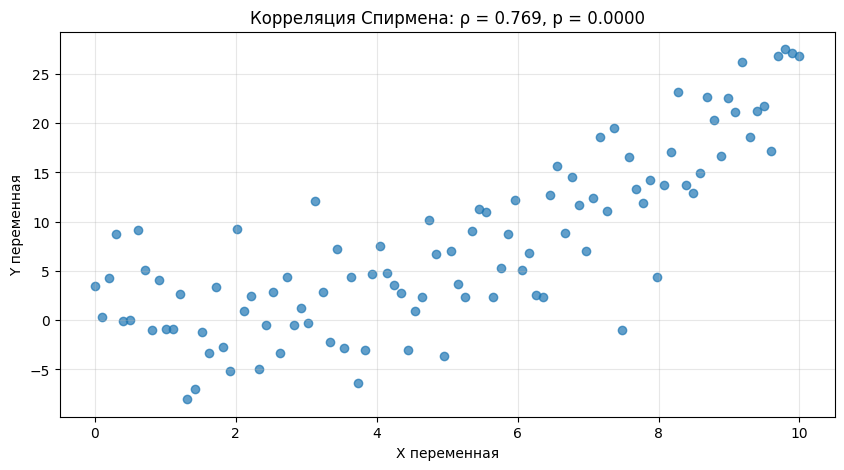

In [5]:
# Создаем нелинейные монотонные данные
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = np.exp(x/3) + np.random.normal(0, 5, 100)  # Экспоненциальная зависимость

# Расчет корреляции Спирмена
spearman_corr, spearman_p = stats.spearmanr(x, y)

print("\nЗАДАЧА 2: Корреляция Спирмена")
print("=" * 50)
print(f"Коэффициент корреляции Спирмена: ρ = {spearman_corr:.4f}")
print(f"P-value: {spearman_p:.4f}")

# Сравнение с Пирсоном
pearson_corr, pearson_p = stats.pearsonr(x, y)
print(f"Коэффициент Пирсона для сравнения: r = {pearson_corr:.4f}")

# Визуализация
plt.figure(figsize=(10, 5))
plt.scatter(x, y, alpha=0.7)
plt.title(f'Корреляция Спирмена: ρ = {spearman_corr:.3f}, p = {spearman_p:.4f}')
plt.xlabel('X переменная')
plt.ylabel('Y переменная')
plt.grid(True, alpha=0.3)
plt.show()

1. z = np.polyfit(x, y, 1)
Функция np.polyfit() аппроксимирует данные полиномом заданной степени.

Параметры:

x, y — массивы данных.

1 — степень полинома (здесь линейная, т.е. прямая линия y = kx + b).

Возвращает: коэффициенты полинома [k, b] (угловой коэффициент и смещение).

2. p = np.poly1d(z)
Функция np.poly1d() создает объект полинома на основе коэффициентов z.

Пример: Если z = [2, 1], то полином будет p(x) = 2*x + 1.

Объект p можно вызывать как функцию для вычисления значений полинома.

3. plt.plot(x, p(x), "r--", alpha=0.8)
Строит график линии тренда:

x — исходные значения по оси X.

p(x) — рассчитанные значения полинома для каждого x.

"r--" — стиль линии: красная пунктирная.

alpha=0.8 — прозрачность 80%.

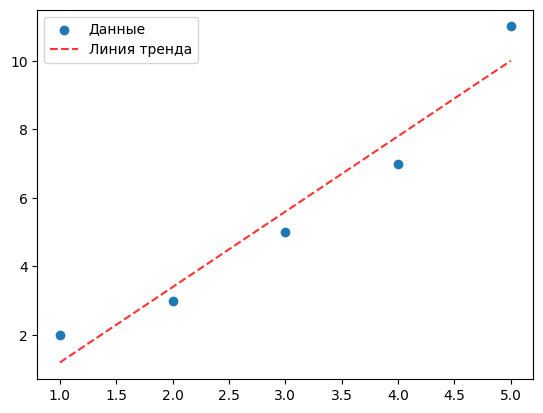

In [6]:
# Пример визуализации
# Обычно этот код используется вместе с диаграммой рассеяния:


import matplotlib.pyplot as plt
import numpy as np

# Данные
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 7, 11])

# Точечный график
plt.scatter(x, y, label='Данные')

# Линия тренда
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", alpha=0.8, label='Линия тренда')

plt.legend()
plt.show()

z = np.polyfit(x, y, 1) - Степень 1

Что означает 1:

Аппроксимация данных линейной функцией (прямой линией)

Уравнение имеет вид: y = k*x + b

Функция возвращает массив из двух коэффициентов: [k, b]

Пример:

python
# Если z = [2, 1], то уравнение линии: y = 2*x + 1
Применение: Идеально для анализа линейной корреляции (коэффициента Пирсона), который измеряет именно линейную зависимость.

z = np.polyfit(x, y, 2) - Степень 2
Что означает 2:

Аппроксимация данных квадратичной функцией (параболой)

Уравнение имеет вид: y = a*x² + b*x + c

Функция возвращает массив из трех коэффициентов: [a, b, c]

Пример:

python
# Если z = [1, -2, 3], то уравнение: y = 1*x² - 2*x + 3

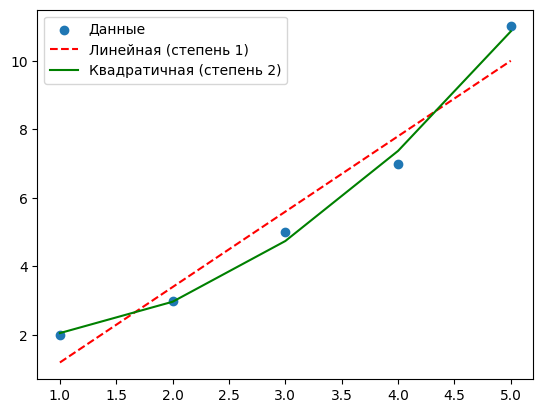

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Пример данных
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 7, 11])

# Линейная аппроксимация (степень 1)
z_linear = np.polyfit(x, y, 1)
p_linear = np.poly1d(z_linear)

# Квадратичная аппроксимация (степень 2)
z_quadratic = np.polyfit(x, y, 2)
p_quadratic = np.poly1d(z_quadratic)

# Построение графиков
plt.scatter(x, y, label='Данные')
plt.plot(x, p_linear(x), 'r--', label='Линейная (степень 1)')
plt.plot(x, p_quadratic(x), 'g-', label='Квадратичная (степень 2)')
plt.legend()
plt.show()